In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as statsx
from sklearn.linear_model import LinearRegression

In [37]:
# Definition of various metrics 

def mean_squared_error(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred)

def root_mean_squared_error(y_true, y_pred):
    return (y_true - y_pred) ** 2 ** 0.5

def classification_metrics(y_true, y_pred):
    """
    Retourne un tableau de 1 et 0 indiquant si les prédictions sont correctes.
    """
    return (y_true == y_pred).astype(int)


In [41]:
def model_errors(n_train, n_test, metrics):

    x = pd.read_csv("x_values_0_5_n300.csv", index_col=0)
    x_values = x.values.flatten()
    y = pd.read_csv("y_quad_values_beta1_1_beta2_0.16_n300_x_0_5_vareps_1.csv", index_col=0)
    y_values = y.values.flatten()
    x_train = x_values[:n_train]
    x_test = x_values[n_train:n_train+n_test]
    y_train = y_values[:n_train]
    y_test = y_values[n_train:n_train+n_test]

    if x_test.size == 0 or y_test.size == 0:
        raise ValueError("Test sample is empty. Please check your n_train and n_test.")

    model_1 = LinearRegression().fit(x_train .reshape(-1,1), y_train.reshape(-1,1)) # Choose your model, in our exemple linear or quadratic regression
    y_pred_1 = model_1.predict(x_test.reshape(-1,1)).flatten()

    error_1 = metrics(y_pred_1, y_test) # Choose your metric, in our example quadratic

    error_df_1 = pd.DataFrame(error_1, columns=['Error'])

    name_model = "linear"
    used_metric = "MSE"
    additional_information = "" # any information you need to remember your model in the filename 

    error_df_1.to_csv(f"Errors_{name_model}_model_{used_metric}_{additional_information}.csv", index=False)

    print(f"Errors of model 1 have been saved in the file : Errors_{name_model}_model_{used_metric}_{additional_information}.csv")

    # If you want to feat two models at the same time 

    model_2 = LinearRegression().fit(np.column_stack((x_train, x_train**2)), y_train.reshape(-1,1))

    y_pred_2 = model_2.predict(np.column_stack((x_test, x_test**2))).flatten()

    error_2 = metrics(y_pred_2, y_test) # Choose your metric, in our example quadratic

    error_df_2 = pd.DataFrame(error_2, columns=['Error'])

    name_model = "quadratic"
    used_metric = "MSE"
    additional_information = "" # any information you need to remember your model in the filename 

    error_df_2.to_csv(f"Errors_{name_model}_model_{used_metric}_{additional_information}.csv", index=False)

    print(f"Errors of model 2 have been saved in the file : Errors_{name_model}_model_{used_metric}_{additional_information}.csv")

In [42]:
model_errors(150,150, mean_squared_error)

Les erreurs du modèle 1 ont été sauvegardées dans le fichier : Errors_linear_model_MSE_.csv
Les erreurs du modèle 2 ont été sauvegardées dans le fichier : Errors_quadratic_model_MSE_.csv


Example of printing one's models fits

In [15]:
# If you know the form of your output model

def create_linear_model(x, coef):
    intercept, slope = coef
    return intercept + slope * x

def create_quadratic_model(x, coef):
    intercept, (slope1, slope2) = coef
    return intercept + slope1 * x + slope2 * x**2

In [50]:
def plot_model_fits(n_train, n_test): # Depends on the model you selected

    x = pd.read_csv("x_uniform_values_0_5_n300.csv", index_col=0)
    x_values = x.values.flatten()
    y = pd.read_csv("y_quadratic_values_beta1_1_beta2_0.16_n300_x_0_5_vareps_1.csv", index_col=0)
    y_values = y.values.flatten()
    x_train = x_values[:n_train]
    x_test = x_values[n_train:n_train+n_test]
    y_train = y_values[:n_train]
    y_test = y_values[n_train:n_train+n_test]

    if x_test.size == 0 or y_test.size == 0:
        raise ValueError("Les ensembles de test sont vides. Veuillez vérifier les indices n_train et n_test.")

    linear_model = LinearRegression().fit(x_train.reshape(-1,1), y_train.reshape(-1,1)) # Choose your model, in our exemple linear regression
    quadratic_model = LinearRegression().fit(np.column_stack((x_train, x_train**2)), y_train.reshape(-1,1))
    
    # We keep the fitted models to plot them, example with linear model and quadratic models

    linear_coef = linear_model.coef_[0]  
    print("linear coef : (on x)", linear_coef, "real coef :", 1)
    linear_intercept = linear_model.intercept_
    print("linear constant :", linear_intercept)

    quadratic_coef = quadratic_model.coef_[0]
    print("quadratic coef : (on x, then x**2)", quadratic_coef, "real coef :", 1, 0.16)
    quadratic_intercept = quadratic_model.intercept_
    print("quadratic constant :", quadratic_intercept)

    x_continuous = np.linspace(0,5,1000)
    linear_model_fitted = create_linear_model(x_continuous, [linear_intercept, linear_coef]) 
    quadratic_model_fitted = create_quadratic_model(x_continuous, [quadratic_intercept, quadratic_coef]) 
 
    plt.figure()
    plt.title("Fitted models")
    plt.scatter(x_values[np.argsort(x_values)], y_values[np.argsort(x_values)], color='green', s=5, label='Real points')
    plt.plot(x_continuous, linear_model_fitted, label = "Linear prediction", color = "r")
    plt.plot(x_continuous, quadratic_model_fitted, label = "Quadratic prediction", color = "orange")
    plt.grid()
    plt.legend()
    plt.plot()

linear coef : (on x) [1.84392453] real coef : 1
linear constant : [-0.80307074]
quadratic coef : (on x, then x**2) [1.03962321 0.1551542 ] real coef : 1 0.16
quadratic constant : [-0.14299999]


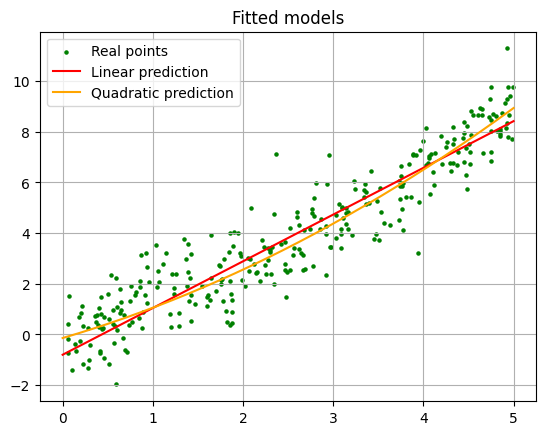

In [51]:
plot_model_fits(150,150)